In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('csv_files/full_stats.csv')

In [3]:
df.drop('Unnamed: 0', axis=1 , inplace=True)

In [4]:
df.head()

,NAME,COLLEGE,YEAR,QBR,PAA,PLAYS,EPA,PASS,RUN,QBR_SACK,PEN,RAW,OVERALL,OFFENSE,DEFENSE,SPECIAL,CMP,PATT,CMP%,PYDS,PAVG,PLNG,PTD,INT,TOTAL_SACKS,RTG,RATT,RYDS,RAVG,RLNG,RTD,AGE,DRAFTED
0,Pat White,BIG12,2005.0,87.5,42.1,267.0,44.3,15.9,32.3,-2.9,-1.6,83.8,77.0,76.2,69.4,46.7,65.0,114.0,57.0,828.0,7.3,50.0,8.0,5.0,5.0,132.4,131.0,952.0,7.3,76.0,7.0,19.0,1.0
1,Vince Young,BIG12,2005.0,86.1,71.5,532.0,75.0,44.5,36.2,-8.1,2.2,80.2,94.8,92.0,85.0,71.9,212.0,325.0,65.2,3036.0,9.3,75.0,26.0,10.0,13.0,163.9,155.0,1050.0,6.8,80.0,12.0,22.0,1.0
2,Brian Brohm,ACC,2005.0,81.2,48.9,385.0,49.8,56.1,1.7,-9.4,2.0,78.9,76.3,84.0,54.4,55.2,207.0,301.0,68.8,2883.0,9.6,76.0,19.0,5.0,17.0,166.7,NaN,NaN,NaN,NaN,NaN,20.0,1.0
3,Rudy Carpenter,PAC-12,2005.0,80.8,39.5,307.0,42.7,51.6,2.5,-13.1,1.2,79.2,68.1,79.0,48.2,50.1,156.0,228.0,68.4,2273.0,10.0,69.0,17.0,2.0,21.0,175.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN
4,Matt Leinart,PAC-12,2005.0,80.5,51.1,529.0,61.5,64.9,6.5,-8.8,-1.0,73.2,94.1,95.8,78.7,40.7,283.0,431.0,65.7,3815.0,8.9,67.0,28.0,8.0,17.0,157.7,NaN,NaN,NaN,NaN,NaN,22.0,1.0


# Regression Model

In [5]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df.drop(['NAME', 'PAA', 'EPA', 'RAW', 'RTG', 'RATT', 'RYDS', 'RAVG', 'RTD', 'RLNG', 'AGE', 'DRAFTED'], axis=1, inplace=True)

In [7]:
dum = pd.get_dummies(df['COLLEGE'])

In [8]:
df = pd.concat([df, dum], axis=1)

In [9]:
df.drop('COLLEGE', axis = 1, inplace = True)

In [10]:
df = df.dropna()

In [11]:
predictors = df.drop(['QBR'], axis= 1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df['QBR'],predictors_int).fit()
model.summary()

C:\Users\bdtol\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    QBR   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     887.8
Date:                Tue, 13 Oct 2020   Prob (F-statistic):               0.00
Time:                        01:30:57   Log-Likelihood:                -5142.1
No. Observations:                1795   AIC:                         1.034e+04
Df Residuals:                    1765   BIC:                         1.051e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -197.4122     49.896     -3.957      0.000    -295.273     -99.552
YEAR            0.0896      0.027      3.320      0.001       0.037       0.143
PLAYS          -0.0345      0.003    -11.517      0.000      -0.040      -0.029
PASS            0.4626      0.017     27.669      0.000       0.430       0.495
RUN             0.4849      0.013     38.023      0.000       0.460       0.510
QBR_SACK        0.5893      0.058     10.122      0.000       0.475       0.703
PEN             0.5549      0.053     10.395      0.000       0.450       0.660
OVERALL        -0.4117      0.079     -5.184      0.000      -0.567      -0.256
OFFENSE         0.4914      0.049     10.035      0.000       0.395       0.587
DEFENSE         0.2833      0.048      5.903      0.000       0.189       0.377
SPECIAL         0.0881      0.017      5.059      0.000       0.054       0.122
CMP            -0.2067      0.018    -11.218      0.000      -0.243      -0.171
PATT            0.2169      0.012     18.627      0.000       0.194       0.240
CMP%            0.7209      0.059     12.312      0.000       0.606       0.836
PYDS           -0.0107      0.001    -10.053      0.000      -0.013      -0.009
PAVG            3.3046      0.302     10.944      0.000       2.712       3.897
PLNG           -0.0015      0.009     -0.169      0.866      -0.019       0.016
PTD            -0.0794      0.028     -2.810      0.005      -0.135      -0.024
INT             0.0146      0.038      0.384      0.701      -0.060       0.089
TOTAL_SACKS     0.0814      0.037      2.173      0.030       0.008       0.155
ACC           -14.2186      4.557     -3.120      0.002     -23.157      -5.280
American      -19.6102      4.534     -4.325      0.000     -28.502     -10.718
BIG10         -14.8229      4.559     -3.252      0.001     -23.764      -5.882
BIG12         -15.7418      4.553     -3.458      0.001     -24.671      -6.812
C-USA         -21.6144      4.534     -4.767      0.000     -30.507     -12.722
INDEP         -19.9348      4.571     -4.361      0.000     -28.900     -10.970
MAC           -21.5184      4.522     -4.758      0.000     -30.388     -12.649
MTN-WEST      -20.7094      4.525     -4.577      0.000     -29.584     -11.834
PAC-12        -14.0803      4.562     -3.086      0.002     -23.029      -5.132
SEC           -12.8156      4.567     -2.806      0.005     -21.773      -3.858
SUN-BELT      -22.3458      4.567     -4.893      0.000     -31.304     -13.388
==============================================================================
Omnibus:                       25.172   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.670
Skew:                          -0.084   Prob(JB):                     8.94e-10
Kurtosis:                       3.727   Cond. N

In [12]:
y = df['QBR']
X = predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)

print('Train RMSE:', np.sqrt(mse_train))
print('Test RMSE:', np.sqrt(mse_test))

Train RMSE: 4.2445279454302565
Test RMSE: 4.31682206211195


# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree

In [63]:
X = df.drop(['QBR'], axis = 1)
y = df['QBR']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [64]:
regressor = DecisionTreeRegressor()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

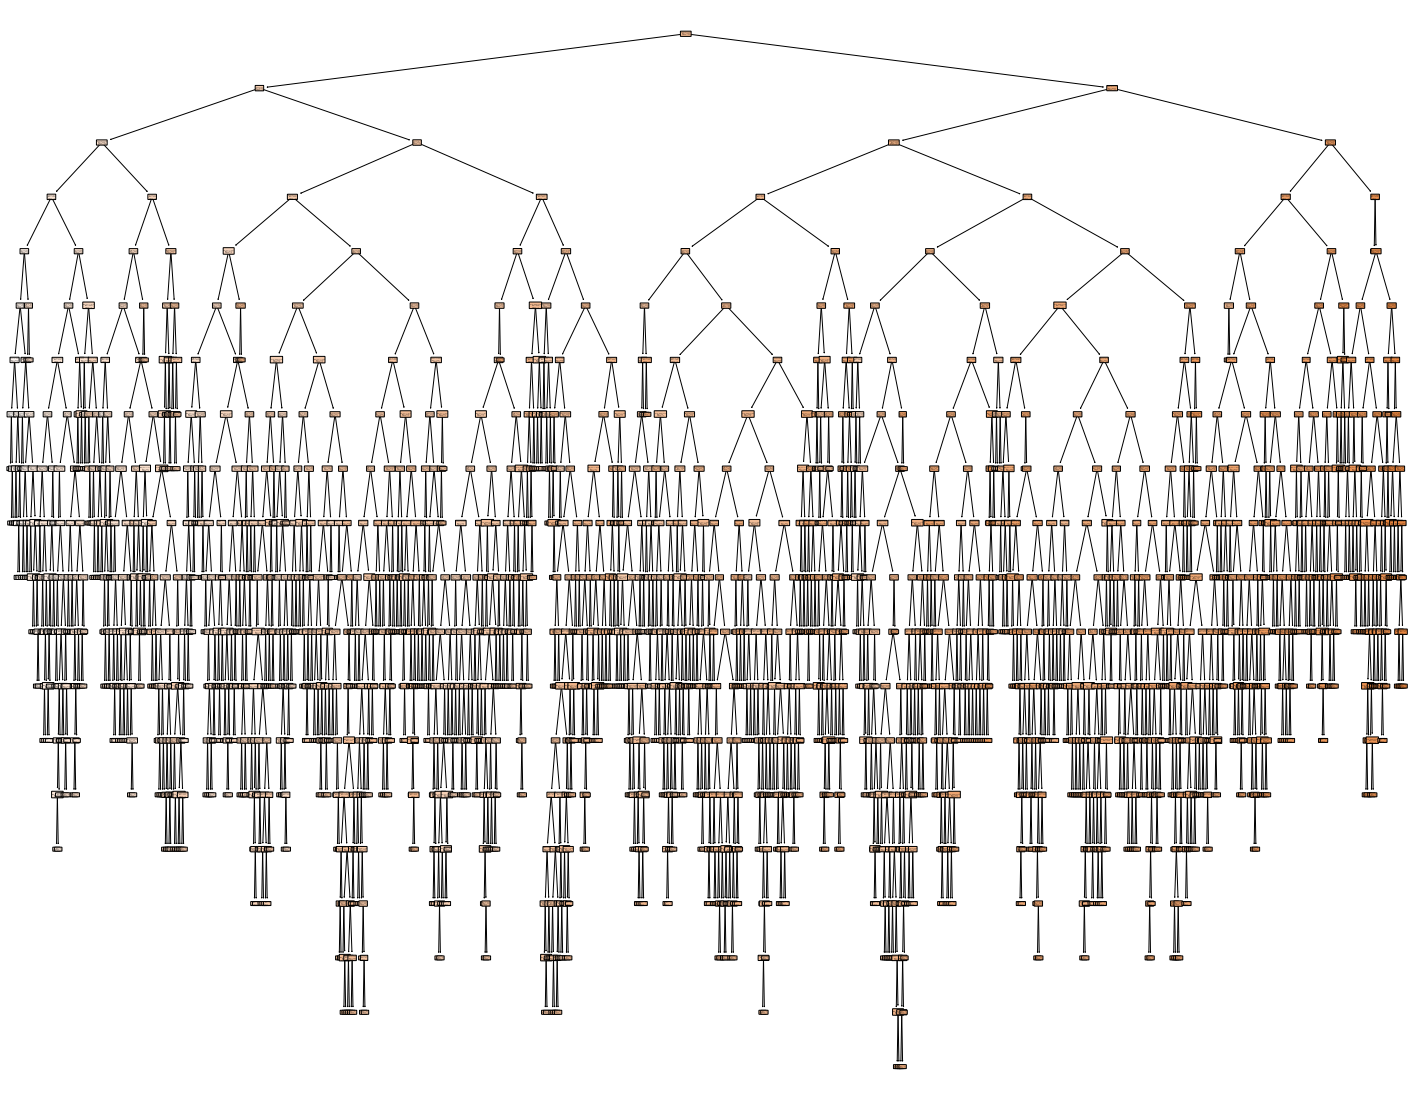

In [67]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(regressor, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

In [28]:
def plot_feature_importance(importance,names,model_type, f,l):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'][f:l], y=fi_df['feature_names'][f:l])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

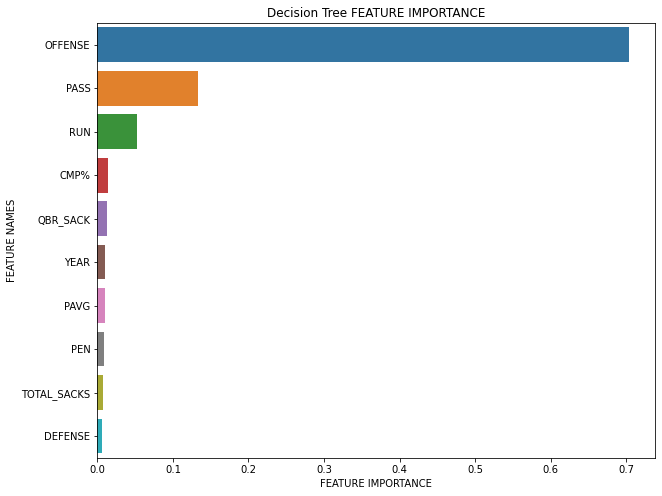

In [18]:
plot_feature_importance(regressor.feature_importances_, X_train.columns, 'Decision Tree', 0, 10)

In [19]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Make predictions and evaluate 
y_pred = regressor.predict(X_test)
print('MSE score:', mse(y_test, y_pred))
print('RMSE score:', np.sqrt(mse(y_test, y_pred)))
print('R-sq score:', r2_score(y_test,y_pred))

MSE score: 61.98977728285078
RMSE score: 7.873358704063392
R-sq score: 0.7919094837610493


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [21]:
X = df.drop(['QBR'], axis = 1)
y = df['QBR']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [22]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
y_pred = forest.predict(X_test)
print('MSE score:', mse(y_test, y_pred))
print('RMSE score:', np.sqrt(mse(y_test, y_pred)))
print('R-sq score:', r2_score(y_test,y_pred))

MSE score: 30.003163870824046
RMSE score: 5.477514388007032
R-sq score: 0.8992838152943515


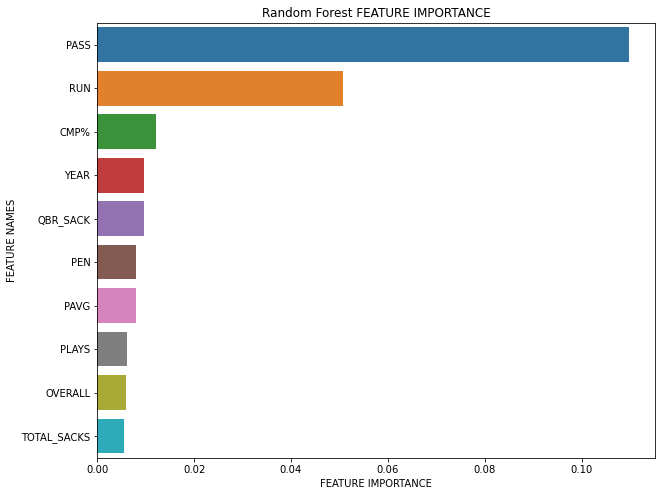

In [29]:
plot_feature_importance(forest.feature_importances_, X_train.columns, 'Random Forest', 1, 11)

# Grid Search

In [30]:
from sklearn.model_selection import  GridSearchCV

In [31]:
X = df.drop(['QBR'], axis = 1)
y = df['QBR']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [42]:
ft_param_grid = {
    'criterion':['mse'],
    'max_features' : [0.2, 0.4, 0.7, 1.0],
    'max_depth': [10,25,45,60],
    'min_samples_split': [3,4,5,6],
    'min_samples_leaf': [1, 2, 3]
}


In [43]:
# Instantiate GridSearchCV
ft_regressor = RandomForestRegressor()
ft_grid_search = GridSearchCV(ft_regressor, ft_param_grid, cv=3, return_train_score=True)

# Fit to the data
ft_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [10, 25, 45, 60],
                         'max_features': [0.2, 0.4, 0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5, 6]},
             return_train_score=True)

In [44]:
ft_grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 25,
 'max_features': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [48]:
forest = RandomForestRegressor(criterion = 'mse',
                              max_depth = 25,
                              max_features = 0.7,
                              min_samples_leaf = 1,
                              min_samples_split = 4)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, max_features=0.7, min_samples_split=4)

In [49]:
y_pred = forest.predict(X_test)
print('MSE score:', mse(y_test, y_pred))
print('RMSE score:', np.sqrt(mse(y_test, y_pred)))
print('R-sq score:', r2_score(y_test,y_pred))

MSE score: 29.373247746663598
RMSE score: 5.419709193920242
R-sq score: 0.9013983505808019


AttributeError: 'RandomForestRegressor' object has no attribute 'tree_'

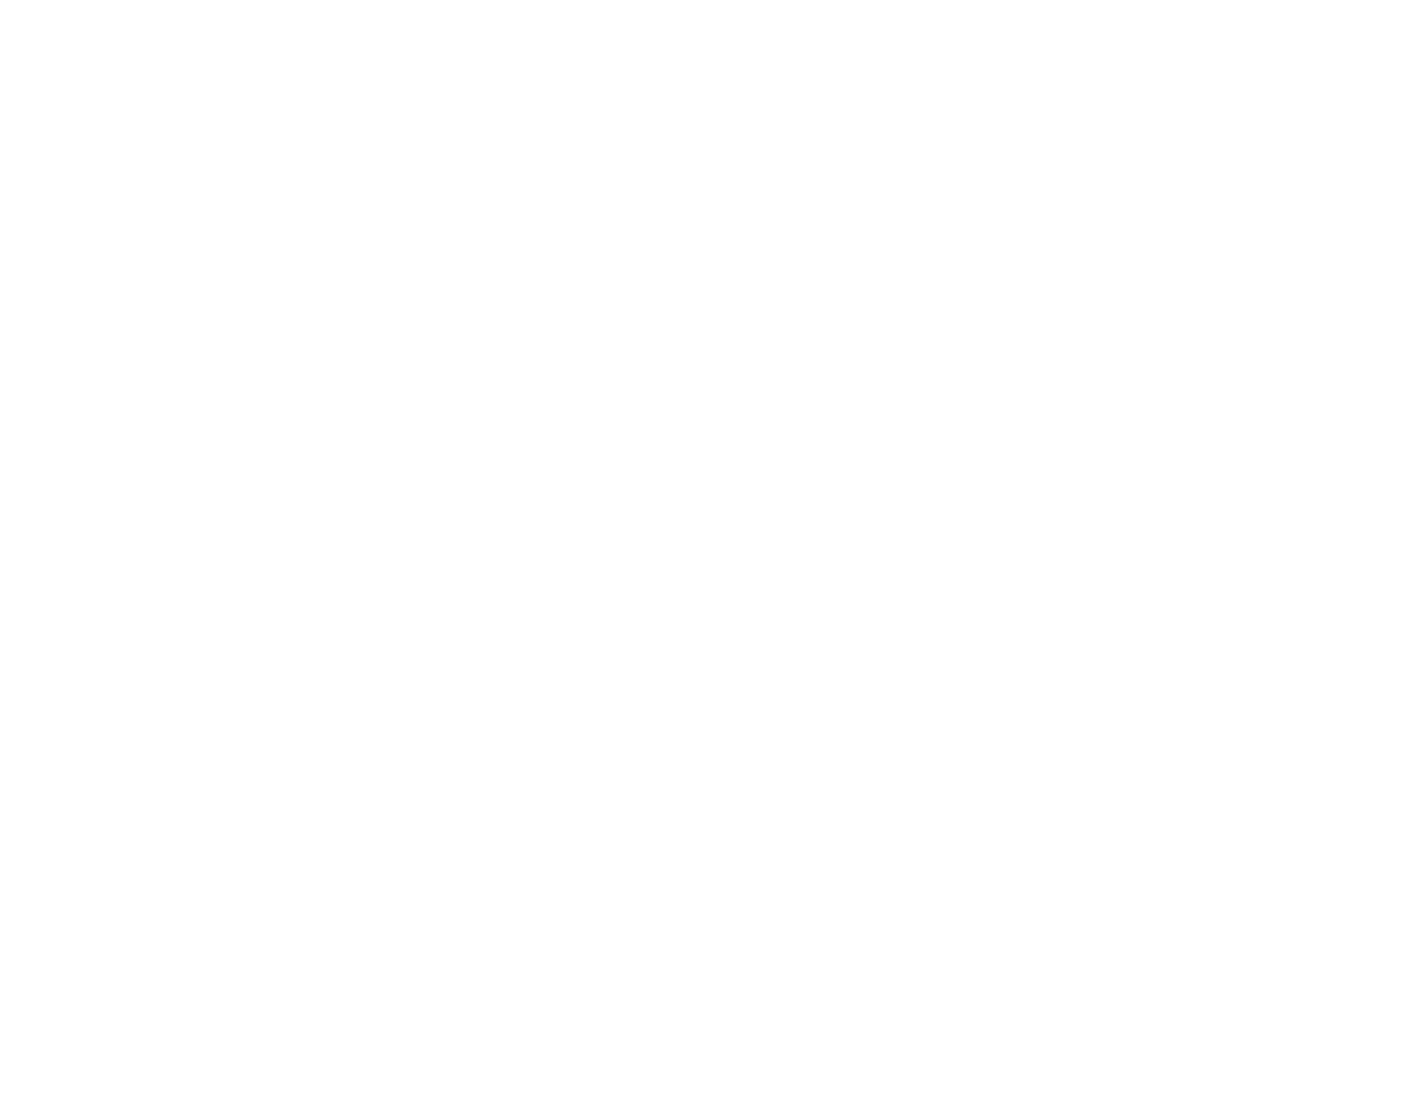

In [47]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(forest, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

In [50]:
from sklearn.tree import export_graphviz

In [69]:
 tree = DecisionTreeRegressor(criterion = 'mse',
                              max_depth = 25,
                              max_features = 0.7,
                              min_samples_leaf = 1,
                              min_samples_split = 4)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25, max_features=0.7, min_samples_split=4)

In [70]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(tree, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

AttributeError: 'DecisionTreeRegressor' object has no attribute 'plot_tree'

<Figure size 1800x1440 with 0 Axes>